In [ ]:
import math
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor# for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
import graphviz
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.decomposition import PCA
import os
from scipy import ndimage
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(1)

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/Breast cancer analysis/breast-cancer-data.csv')
train_data.shape

(569, 33)

In [ ]:
train_data.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
train_data.describe()

id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
count  5.690000e+02   569.000000  ...               569.000000          0.0
mean   3.037183e+07    14.127292  ...                 0.083946          NaN
std    1.250206e+08     3.524049  ...                 0.018061          NaN
min    8.670000e+03     6.981000  ...                 0.055040          NaN
25%    8.692180e+05    11.700000  ...                 0.071460          NaN
50%    9.060240e+05    13.370000  ...                 0.080040          NaN
75%    8.813129e+06    15.780000  ...                 0.092080          NaN
max    9.113205e+08    28.110000  ...                 0.207500          NaN

[8 rows x 32 columns]

In [ ]:
train_data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [ ]:
train_data.drop("Unnamed: 32",axis=1,inplace=True)
train_data.drop("id",axis=1,inplace=True)
train_data.shape


(569, 31)

In [ ]:
train_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:

train_data['diagnosis'].replace({'M':1,'B':0},inplace=True)
train_data.head(6)


diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0          1        17.99  ...          0.4601                  0.11890
1          1        20.57  ...          0.2750                  0.08902
2          1        19.69  ...          0.3613                  0.08758
3          1        11.42  ...          0.6638                  0.17300
4          1        20.29  ...          0.2364                  0.07678
5          1        12.45  ...          0.3985                  0.12440

[6 rows x 31 columns]

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(train_data.drop('diagnosis',axis=1), train_data['diagnosis'], test_size=0.25)
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(426, 30) (426,) (143, 30) (143,)


Number of Benign:  357
Number of Malignant :  212


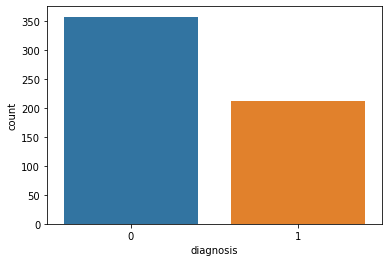

In [ ]:
sns.countplot(train_data['diagnosis'],label="Count")
B, M = train_data['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

corelation matrics


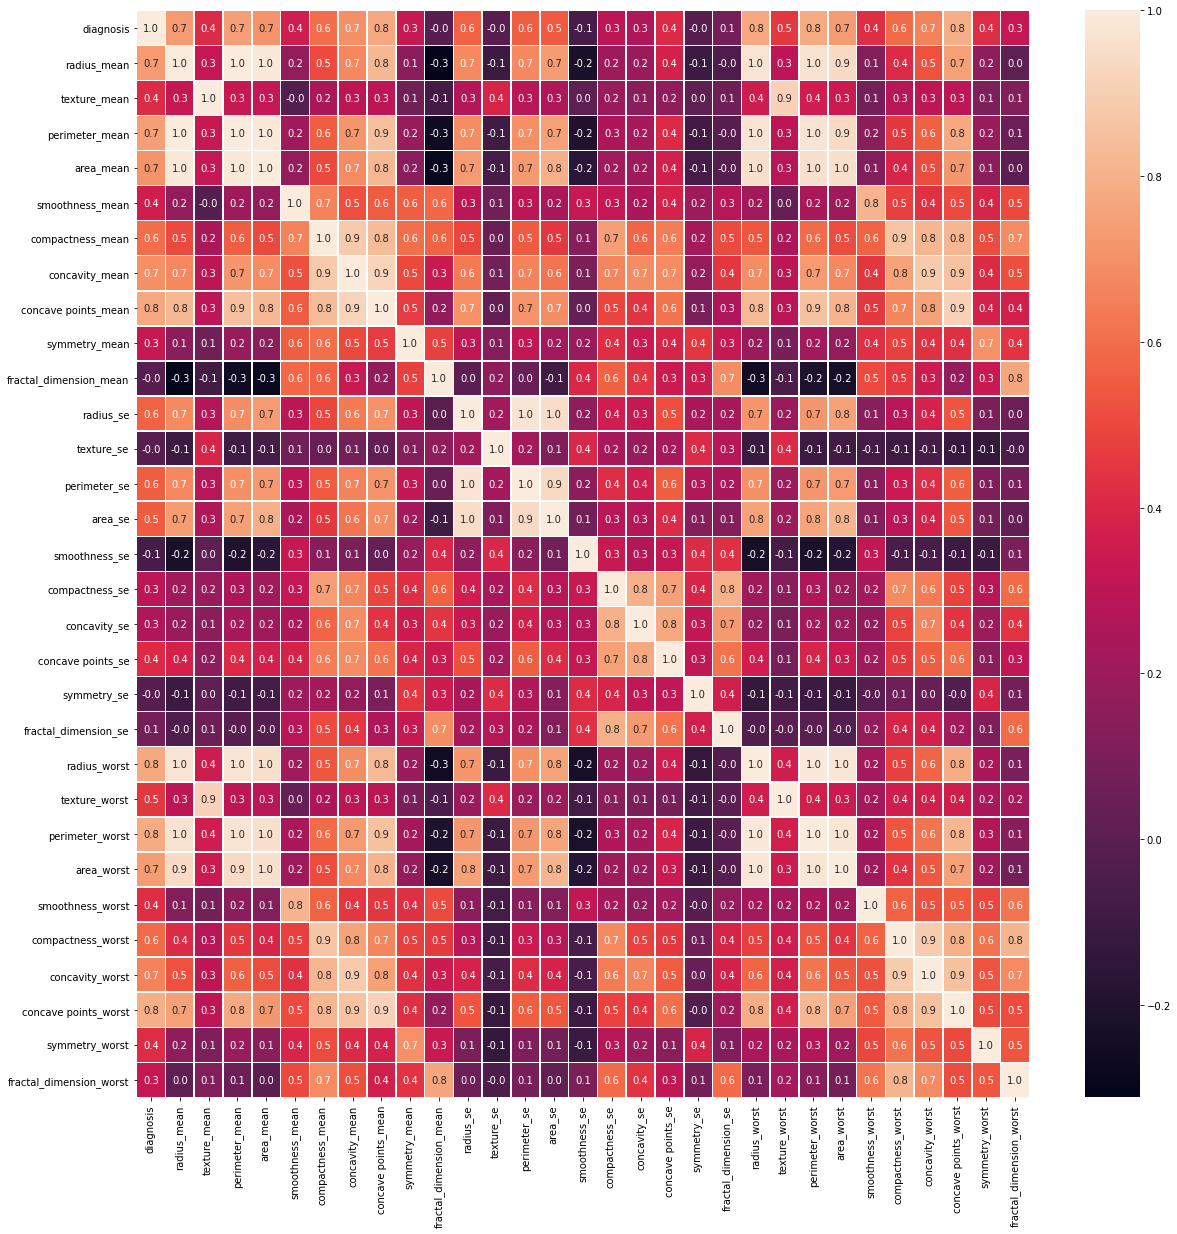

In [37]:

print('corelation matrics')
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

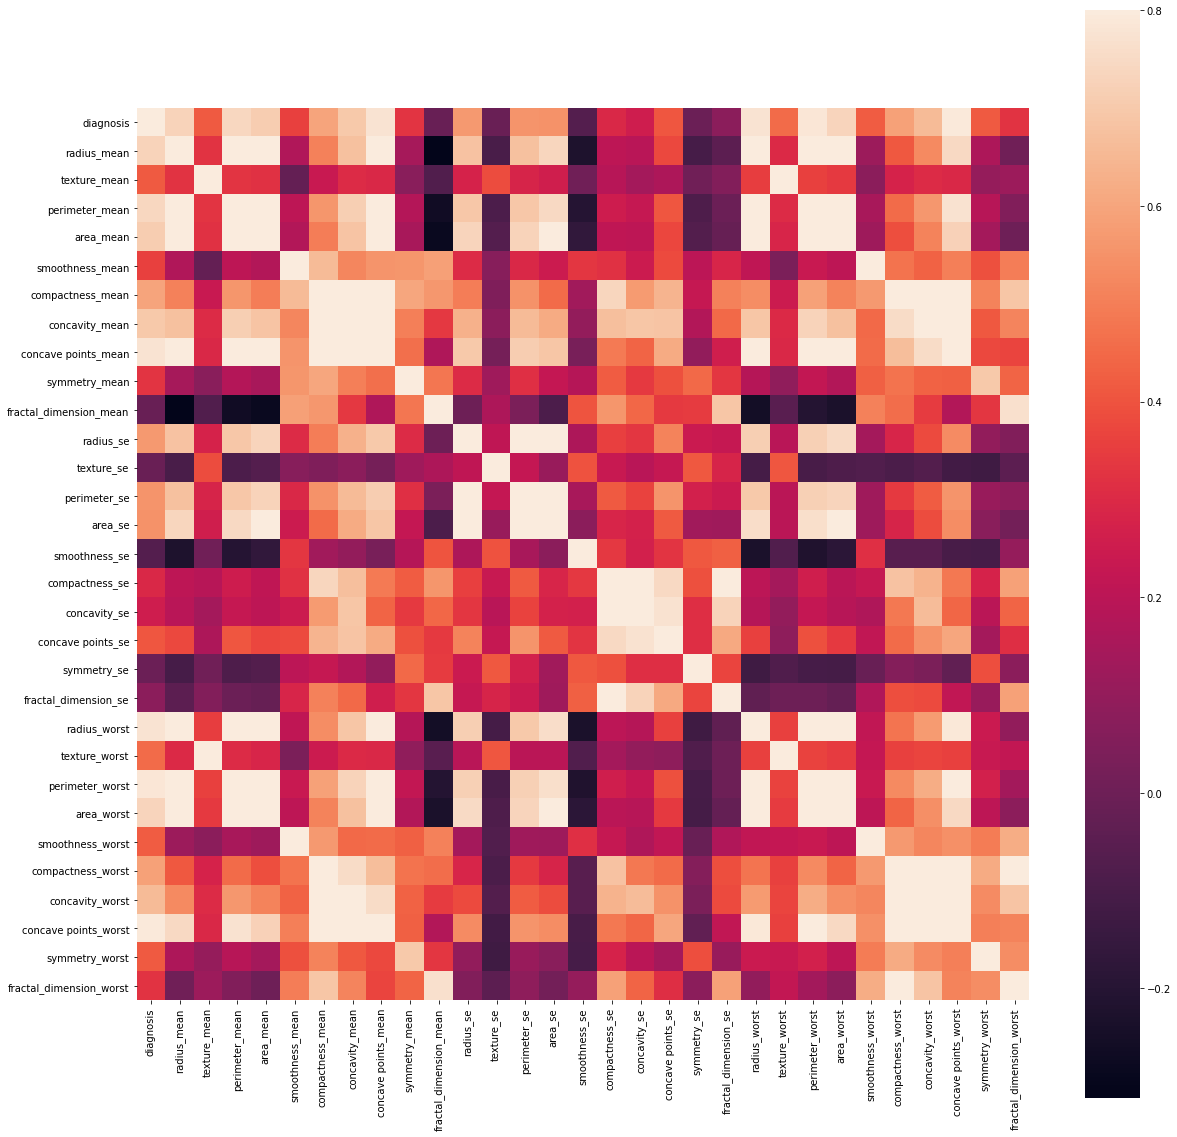

In [38]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

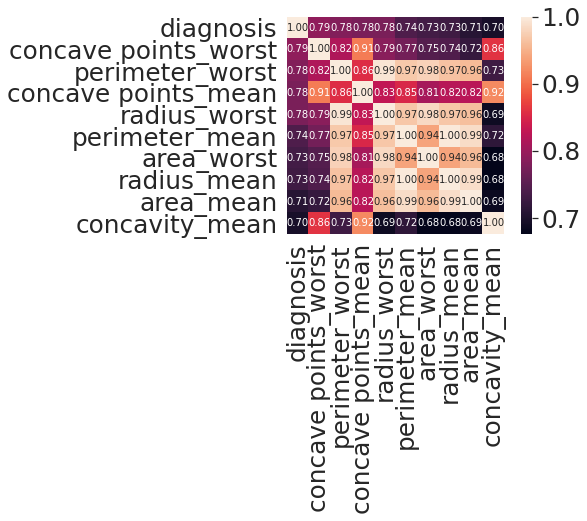

In [39]:

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'diagnosis')['diagnosis'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=2.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


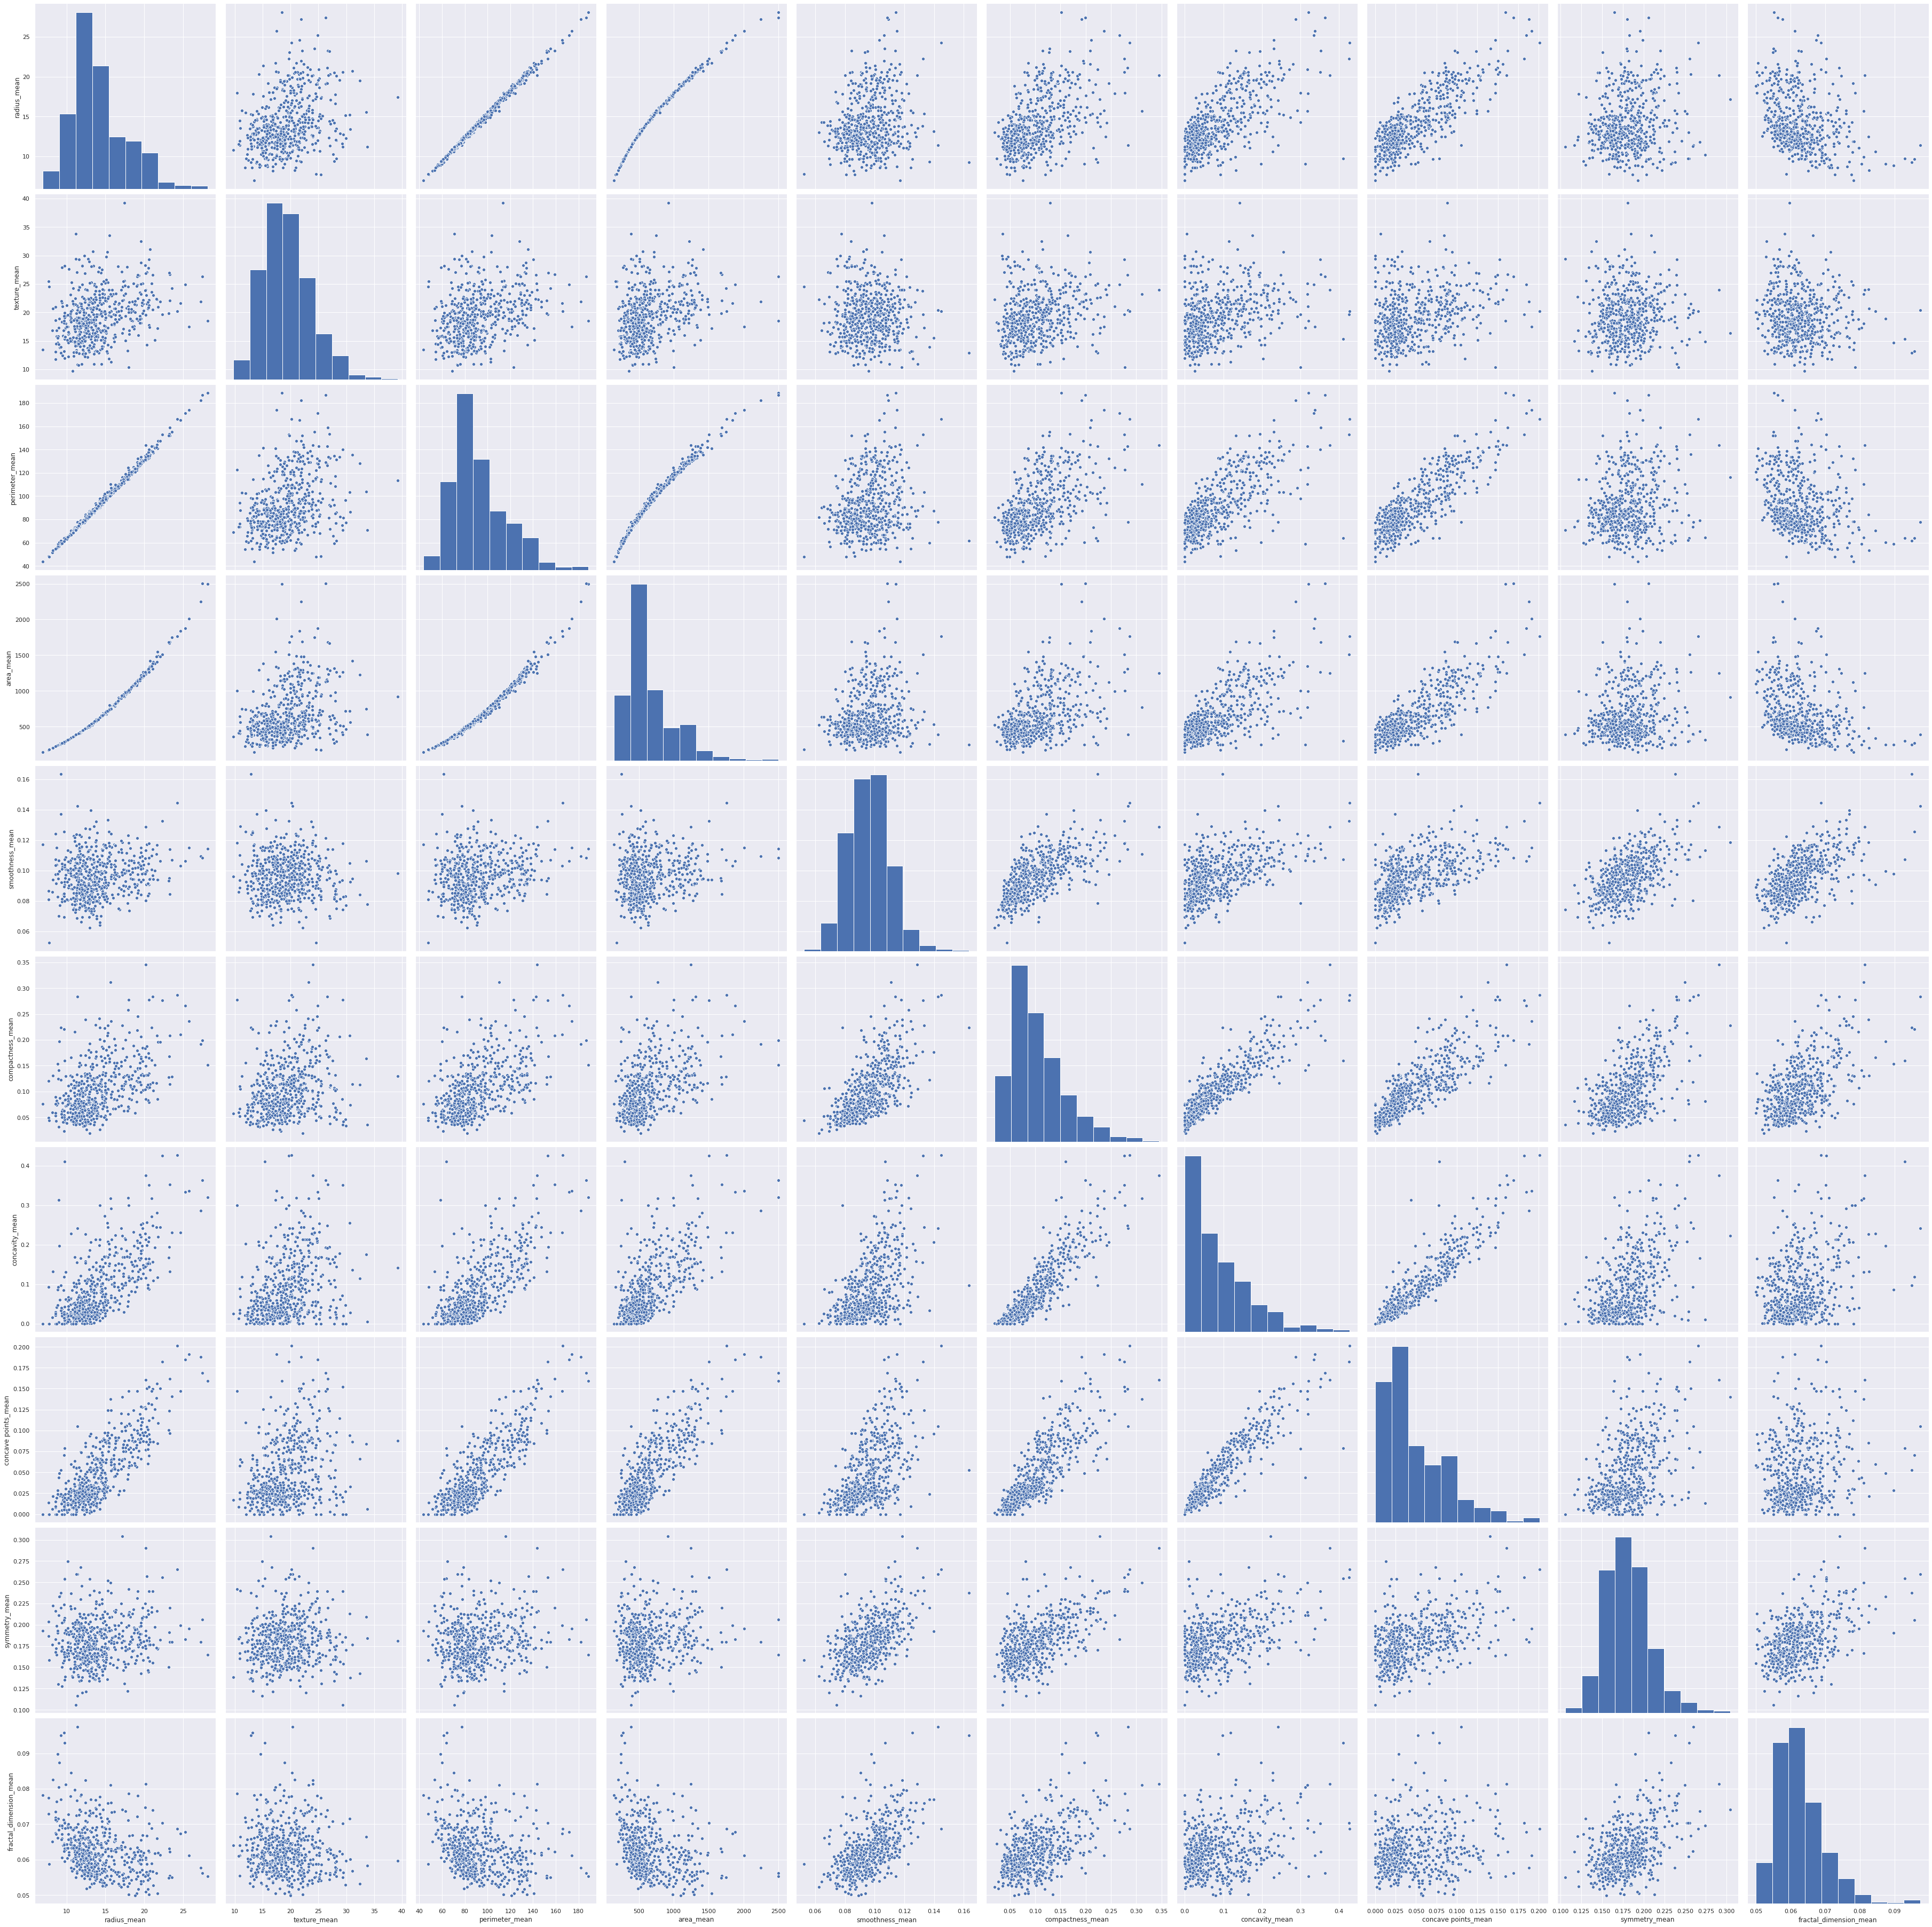

In [40]:
sns.set()
cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
sns.pairplot(train_data[cols], size = 5)
plt.show();


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


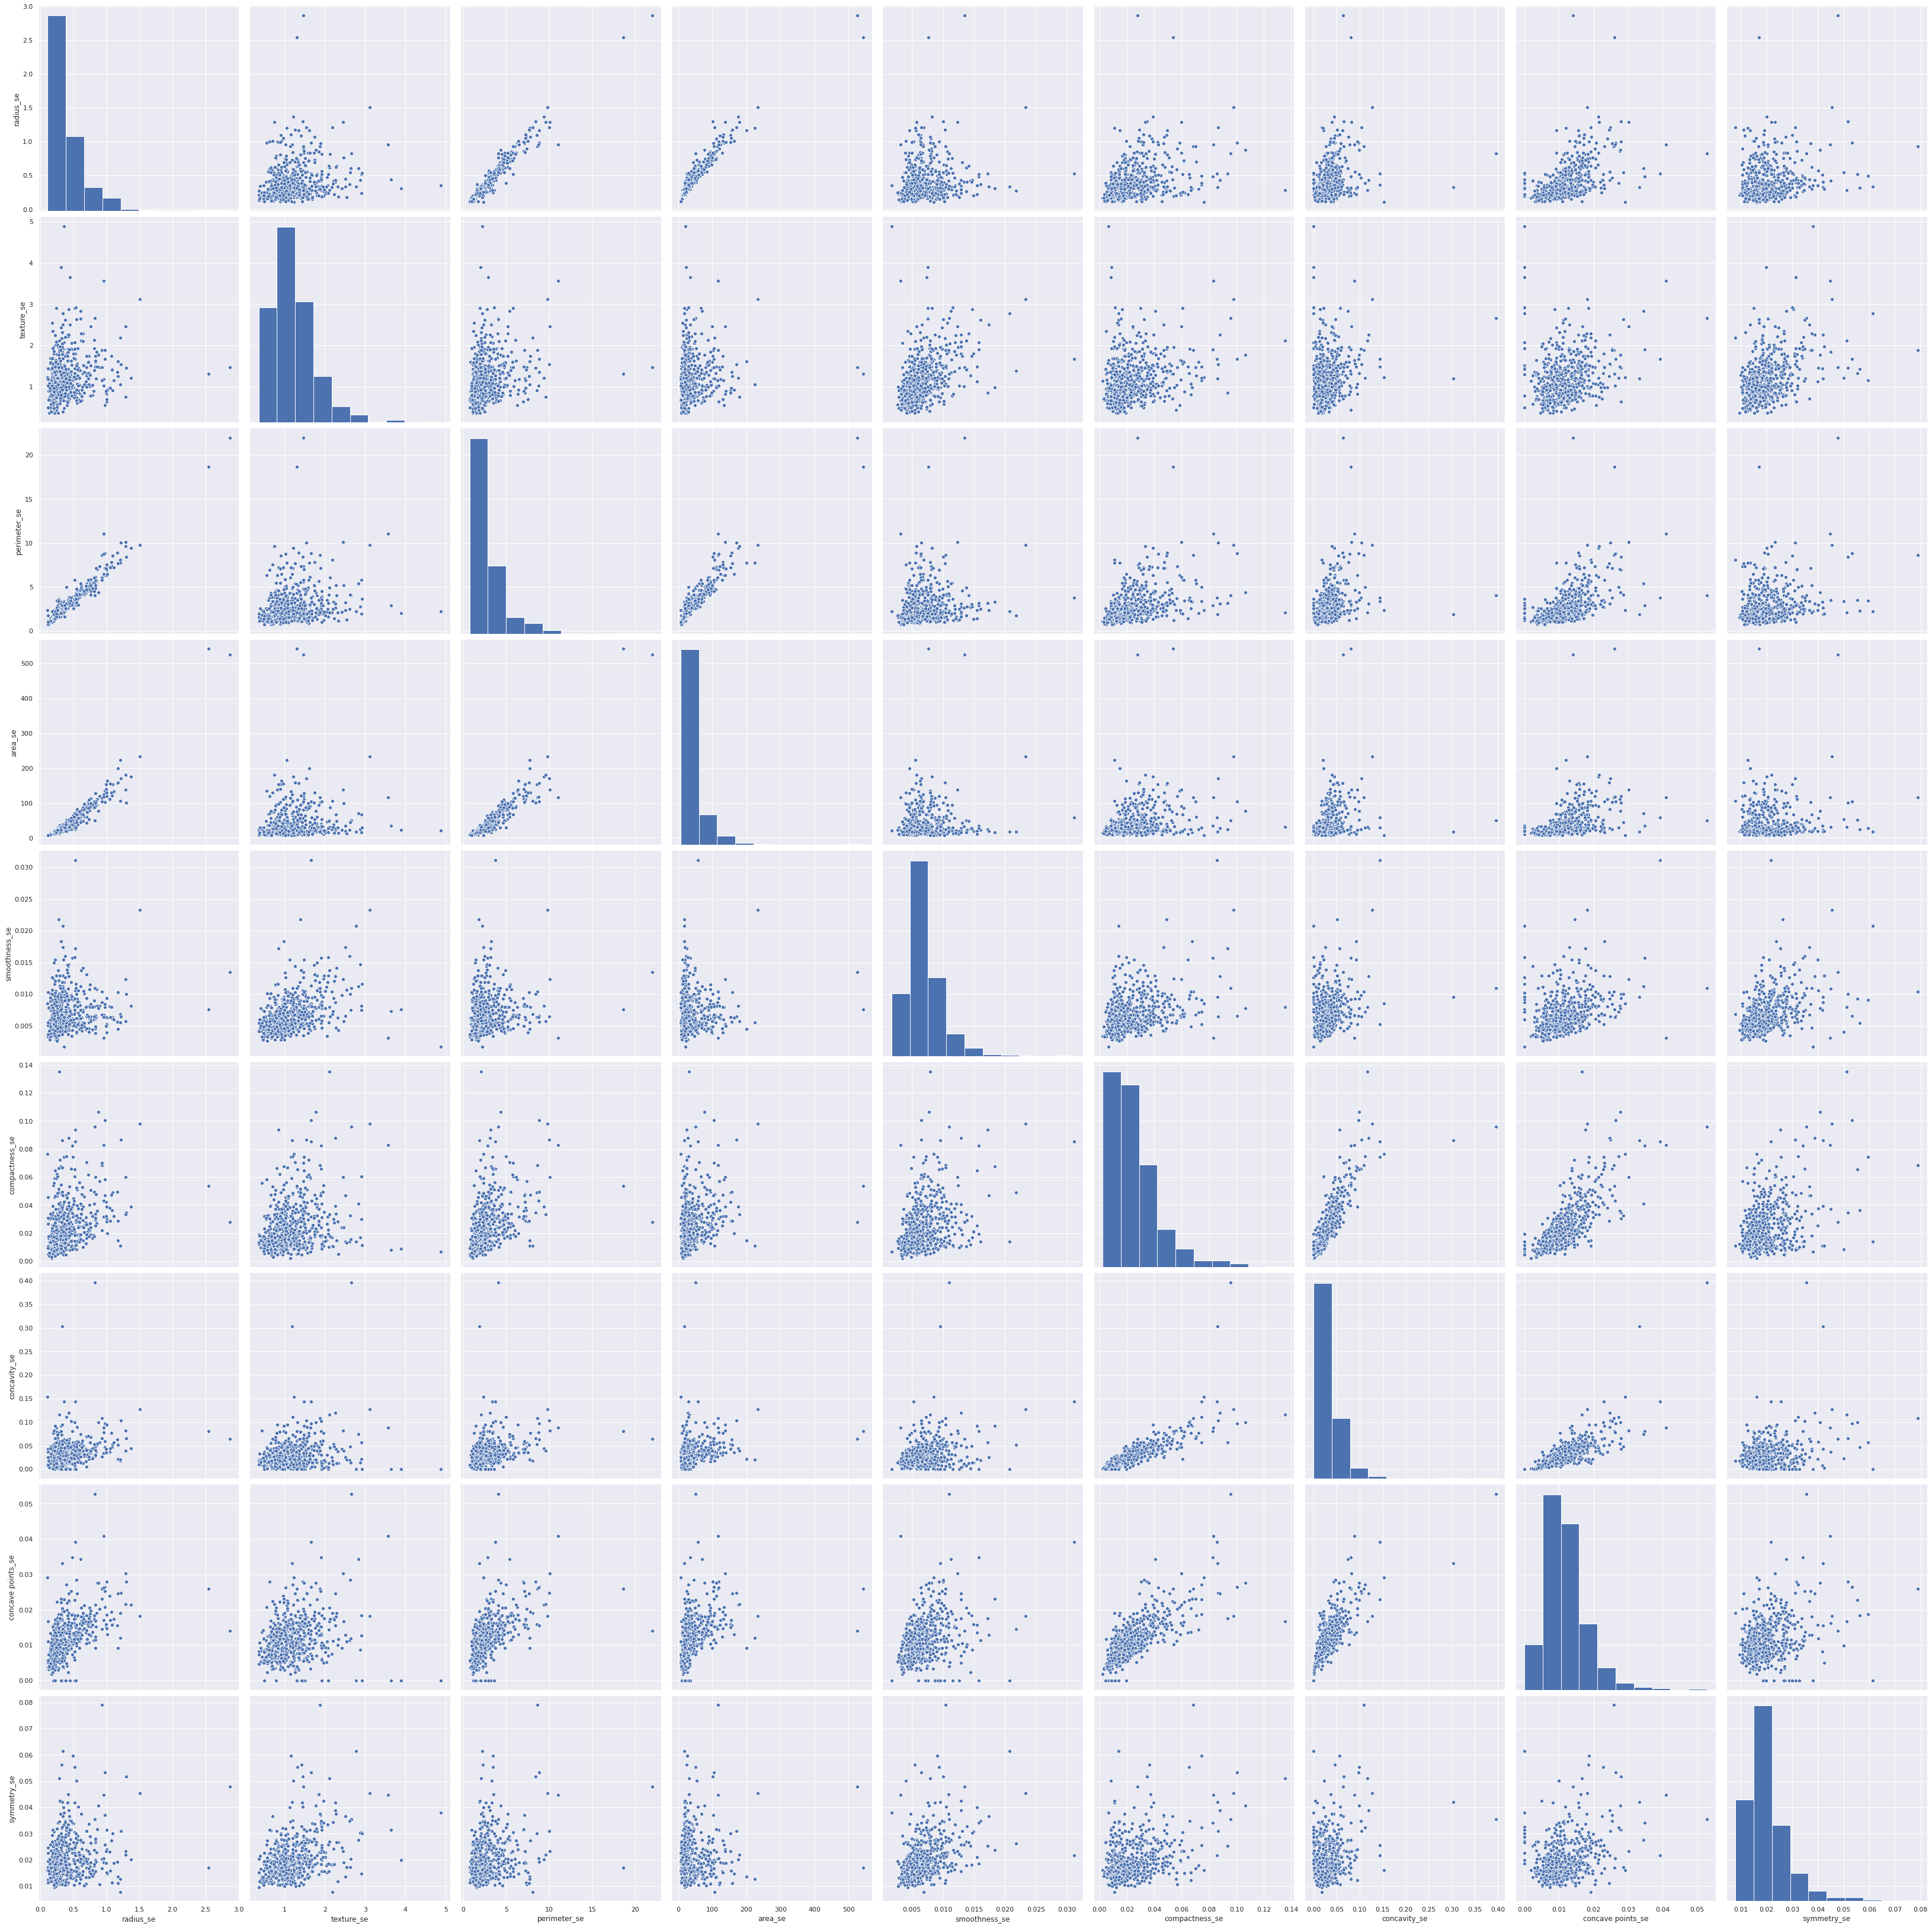

In [42]:
sns.set()
cols = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
sns.pairplot(train_data[cols], size = 5)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


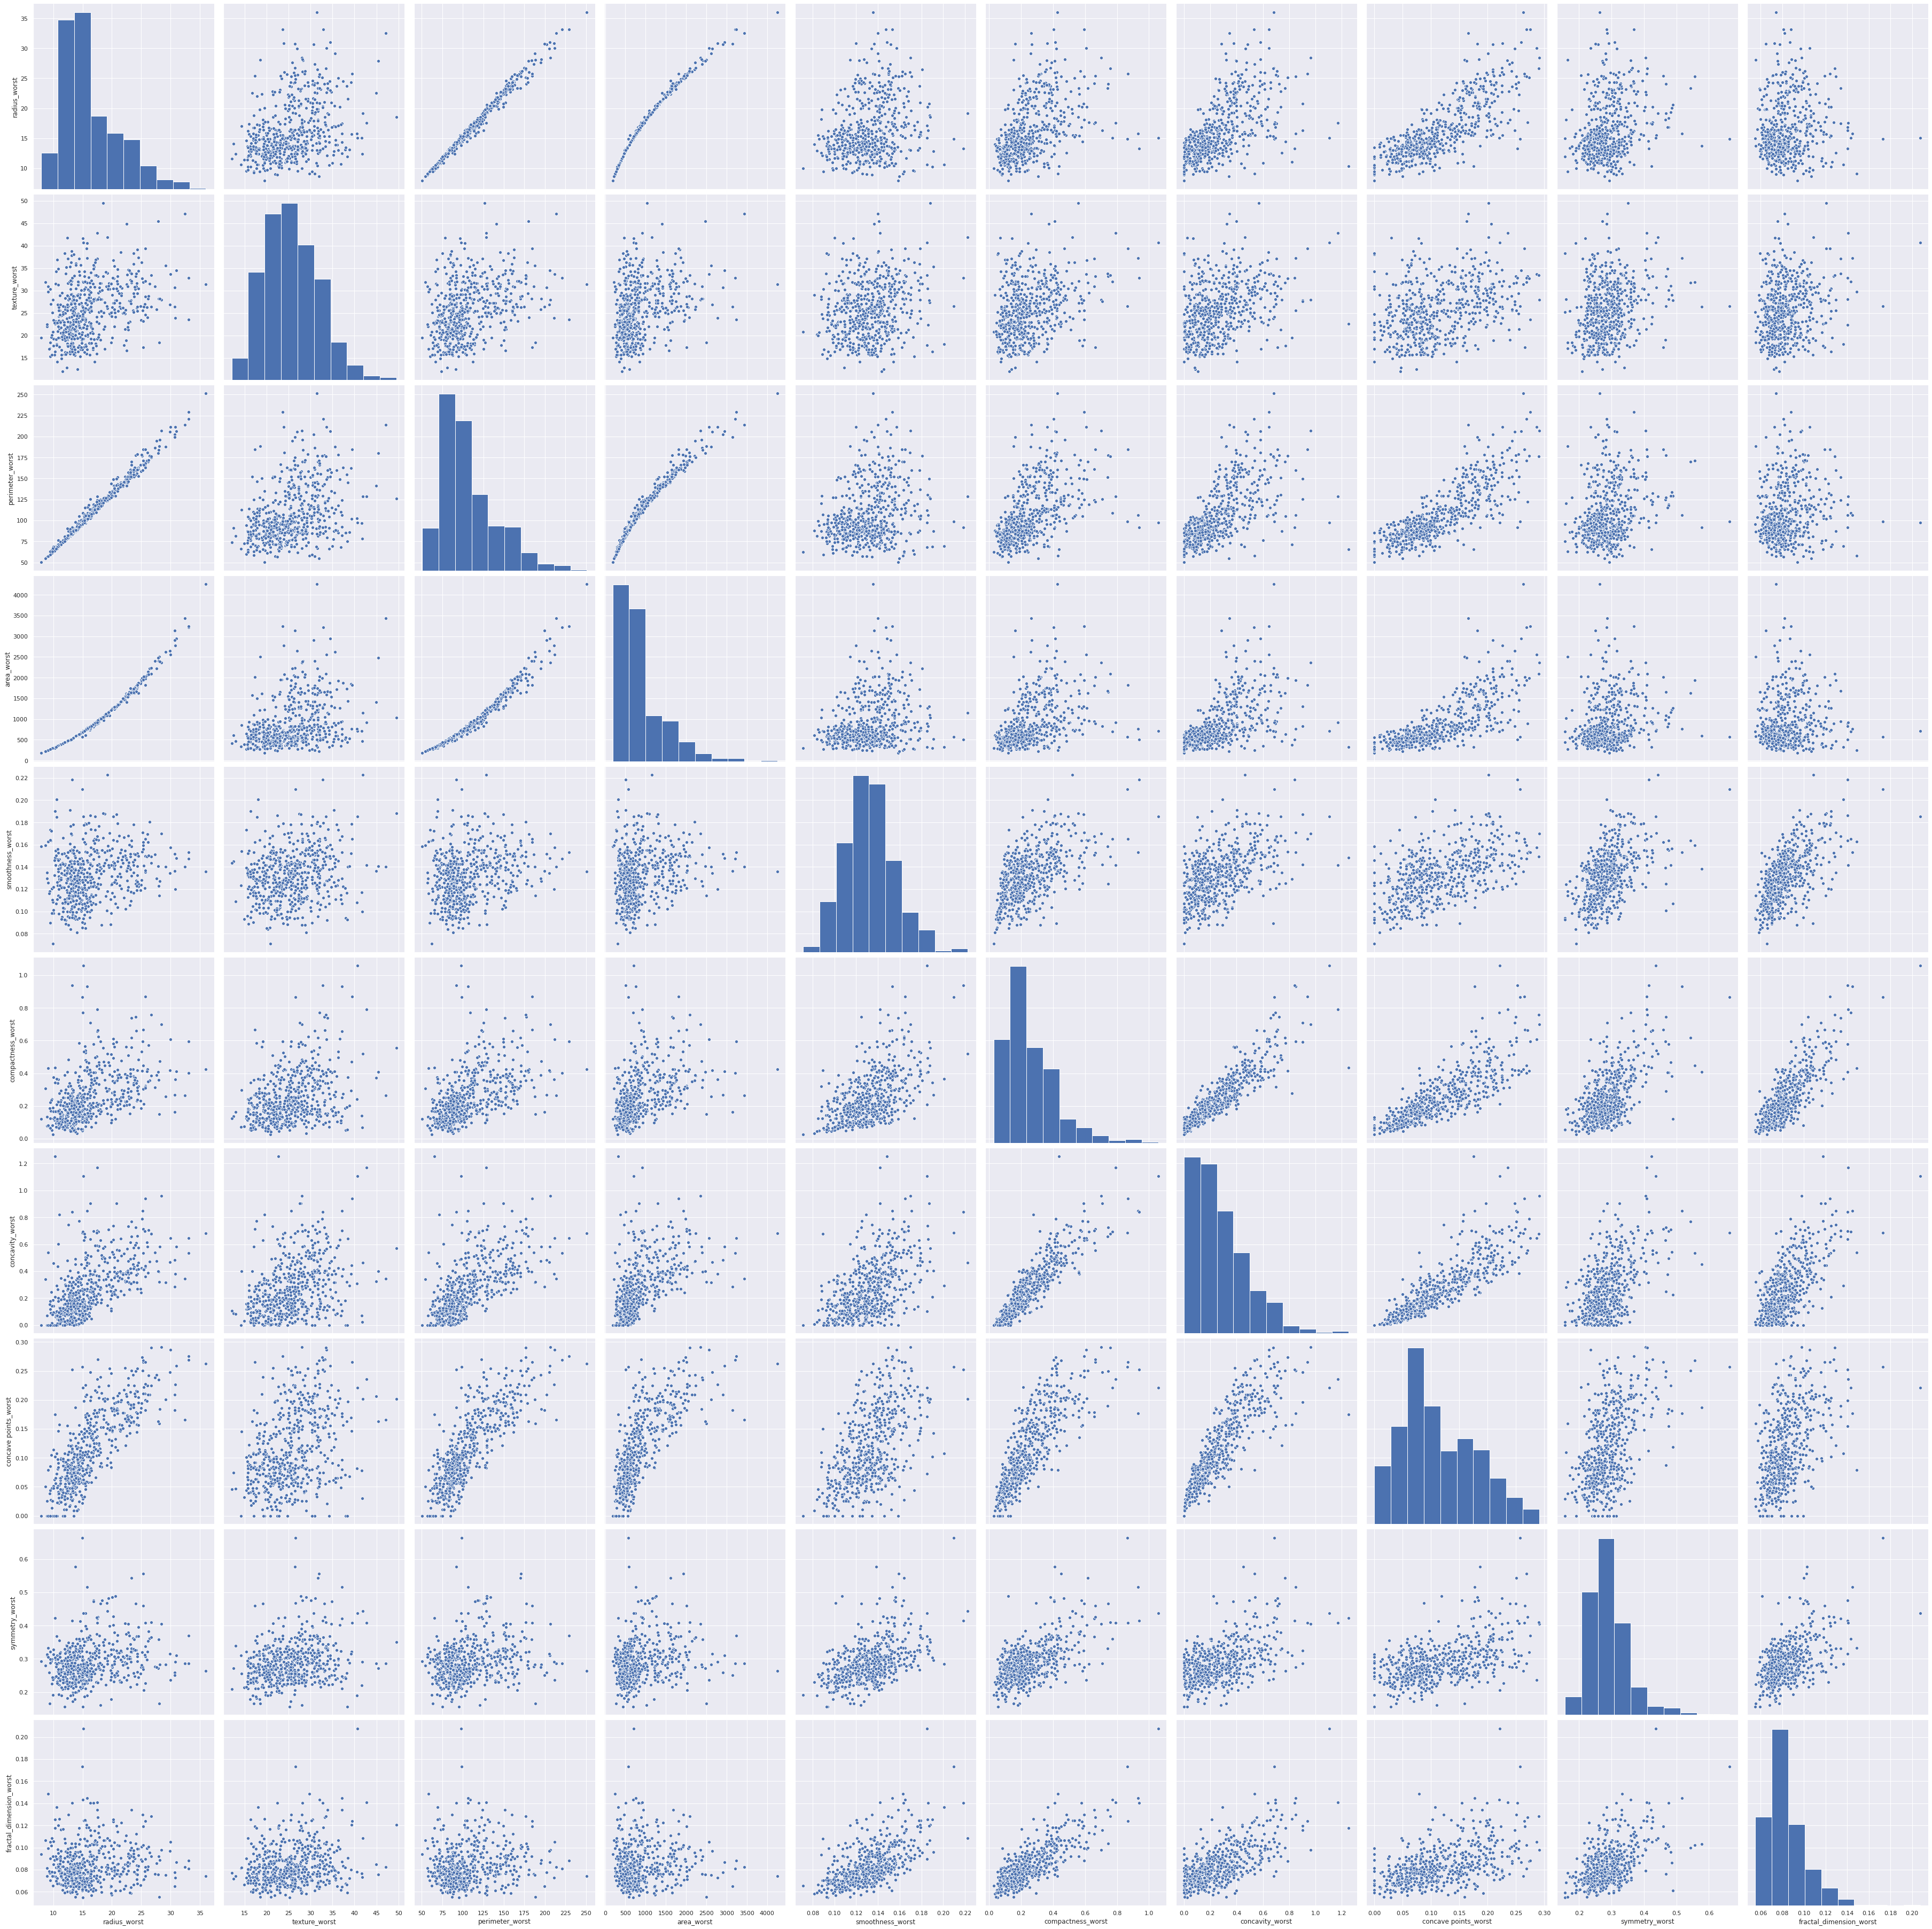

In [43]:
sns.set()
cols = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
sns.pairplot(train_data[cols], size = 5)
plt.show()

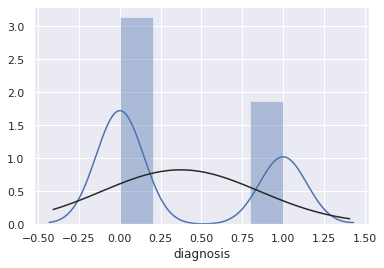

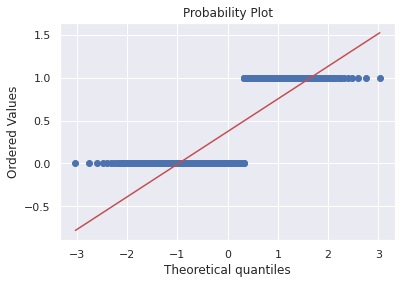

In [44]:
sns.distplot(train_data['diagnosis'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['diagnosis'], plot=plt)

In [45]:

model=RandomForestClassifier(n_estimators=350)
model.fit(train_x,train_y)
pred = model.predict(train_x)
accuracy = model.score(test_x,test_y)
print(accuracy*100,'%')


95.1048951048951 %


In [46]:
gnb = GaussianNB()
gnb.fit(train_x,train_y)
prediction=gnb.predict(test_x)
accuracy = model.score(test_x,test_y)
print(accuracy*100,'%')


95.1048951048951 %


In [47]:
clf = svm.SVC()
clf.fit(train_x,train_y)
accuracy = model.score(test_x,test_y)
print(accuracy*100,'%')

95.1048951048951 %



 Feature Names: 

 [0 1 2 3 4] 


Feature Correlation:



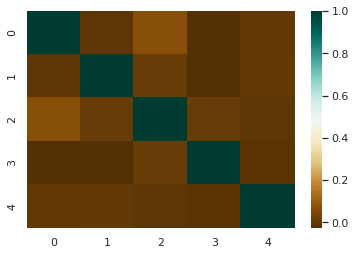

In [48]:
pca = PCA(n_components=5)
x_transformed = pca.fit_transform(train_x,train_y)
xpca = pd.DataFrame(x_transformed)
train_x1, test_x1, train_y1, test_y1 = train_test_split(xpca,train_y, test_size=0.2)
print('\n Feature Names: \n\n', xpca.columns.values, "\n")
print("\nFeature Correlation:\n")
g = sns.heatmap(train_x1.corr(),cmap="BrBG",annot=False)

In [49]:
clf1 = DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(train_x, train_y)
clf2 = DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf2.fit(train_x1,train_y1)
print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(train_x, train_y)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(test_x, test_y)))
print('Accuracy of Decision Tree classifier on PCA-transformed training set: {:.2f}'.format(clf2.score(train_x1, train_y1)))
print('Accuracy of Decision Tree classifier on PCA-transformed test set: {:.2f}'.format(clf2.score(test_x1,test_y1)))

Accuracy of Decision Tree classifier on original training set: 0.95
Accuracy of Decision Tree classifier on original test set: 0.91
Accuracy of Decision Tree classifier on PCA-transformed training set: 0.94
Accuracy of Decision Tree classifier on PCA-transformed test set: 0.94


In [50]:

clf1 = RandomForestClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(train_x, train_y)
clf2 = RandomForestClassifier(max_depth=3,min_samples_leaf=12)
clf2.fit(train_x1,train_y1)
print('Accuracy of Random Forest classifier on original training set: {:.2f}'.format(clf1.score(train_x, train_y)))
print('Accuracy of Random Forest classifier on original test set: {:.2f}'.format(clf1.score(test_x, test_y)))
print('Accuracy of Random Forest classifier on PCA-transformed training set: {:.2f}'.format(clf2.score(train_x1, train_y1)))
print('Accuracy of Random Forest classifier on PCA-transformed test set: {:.2f}'.format(clf2.score(test_x1,test_y1)))

Accuracy of Random Forest classifier on original training set: 0.97
Accuracy of Random Forest classifier on original test set: 0.94
Accuracy of Random Forest classifier on PCA-transformed training set: 0.94
Accuracy of Random Forest classifier on PCA-transformed test set: 0.93
